In [0]:
import numpy as np
import math  
from matplotlib import pyplot as plt
import cv2

In [0]:
class Image(object):
  def __init__(self, path):
    self.path = path

    self.rgb_image = None
    self.bgr_image = None
    self.gray_image = None


  def read_image(self, return_image = False):
    self.rgb_image = plt.imread(self.path)
    if return_image:
      return self.rgb_image


  def bgr(self, return_image = False):
    self.bgr_image = np.flip(plt.imread(self.path), 2)
    if return_image:
      return self.bgr_image


  def gray(self, return_image = False):
    self.gray_image = cv2.cvtColor(plt.imread(self.path), cv2.COLOR_RGB2GRAY)
    if return_image:
      return self.gray_imagezoom_img


  @staticmethod
  def show(image, title = 'image'):
    if len(image.shape) == 3:
      plt.imshow(image)
    else:
      plt.imshow(image, cmap = 'gray')

    plt.title(title)


  @staticmethod
  def show_all(image_list, title_list):
    assert len(image_list) == len(title_list), "Incompatible lengths of lists!"
    N = len(image_list)
    cols = 5
    rows = N // cols
    plt.figure(figsize=[50, 50])

    for i in range(rows):
      for j in range(cols):
        plt.subplot(rows, cols, i * cols + j + 1)
        Image.show(image_list[i * cols + j], title_list[i * cols + j])
    
    plt.show()

In [0]:
class Augmentation:
  @staticmethod
  def flip_img(img, axis):
    return np.flip(img, axis)  


  @staticmethod
  def rotate_img(img, theta):
    center = tuple(np.array(img.shape[1::-1]) / 2)
    rotated_matrix = cv2.getRotationMatrix2D(center, theta, 1.0)
    rotated_img = cv2.warpAffine(img, rotated_matrix, img.shape[1::-1], flags=cv2.INTER_LINEAR)

    return rotated_img
  

  @staticmethod
  def crop_img(img, y, x, index_coordinate):
    if index_coordinate[0] + y >= img.shape[0]:
      y = img.shape[0] - index_coordinate[0] - 1
    if index_coordinate[1] + x >= img.shape[1]:
      y = img.shape[1] - index_coordinate[1] - 1
      
    return img[index_coordinate[0]:index_coordinate[0] + y, index_coordinate[1]:index_coordinate[1] + x]


  @staticmethod
  def gaussian_blur(img, kernel_size, sigma):
    rand_size = np.random.choice([3, 5, 7, 9 ,11], 1, [1/5] * 5)
    blurred_img = cv2.GaussianBlur(img, kernel_size, sigma, cv2.BORDER_DEFAULT)
    return blurred_img


  @staticmethod
  def median_blur(img, kernel_size):
    rand_size = np.random.choice([3, 5, 7, 9 ,11], 1, [1/5] * 5) 
    blurred_img = cv2.medianBlur(img, kernel_size)
    return blurred_img
 
  
  @staticmethod
  def zoom_img(img, zoom_level, pos):
    x = int(img.shape[1] * 1/zoom_level)
    y = int(img.shape[0] * 1/zoom_level)

    dimension = (img.shape[1], img.shape[0])
    new_img = Augmentation.crop_img(img, x, y, (pos[0], pos[1]))
    zoomed_img = cv2.resize(new_img, dimension, interpolation = cv2.INTER_AREA)

    return zoomed_img

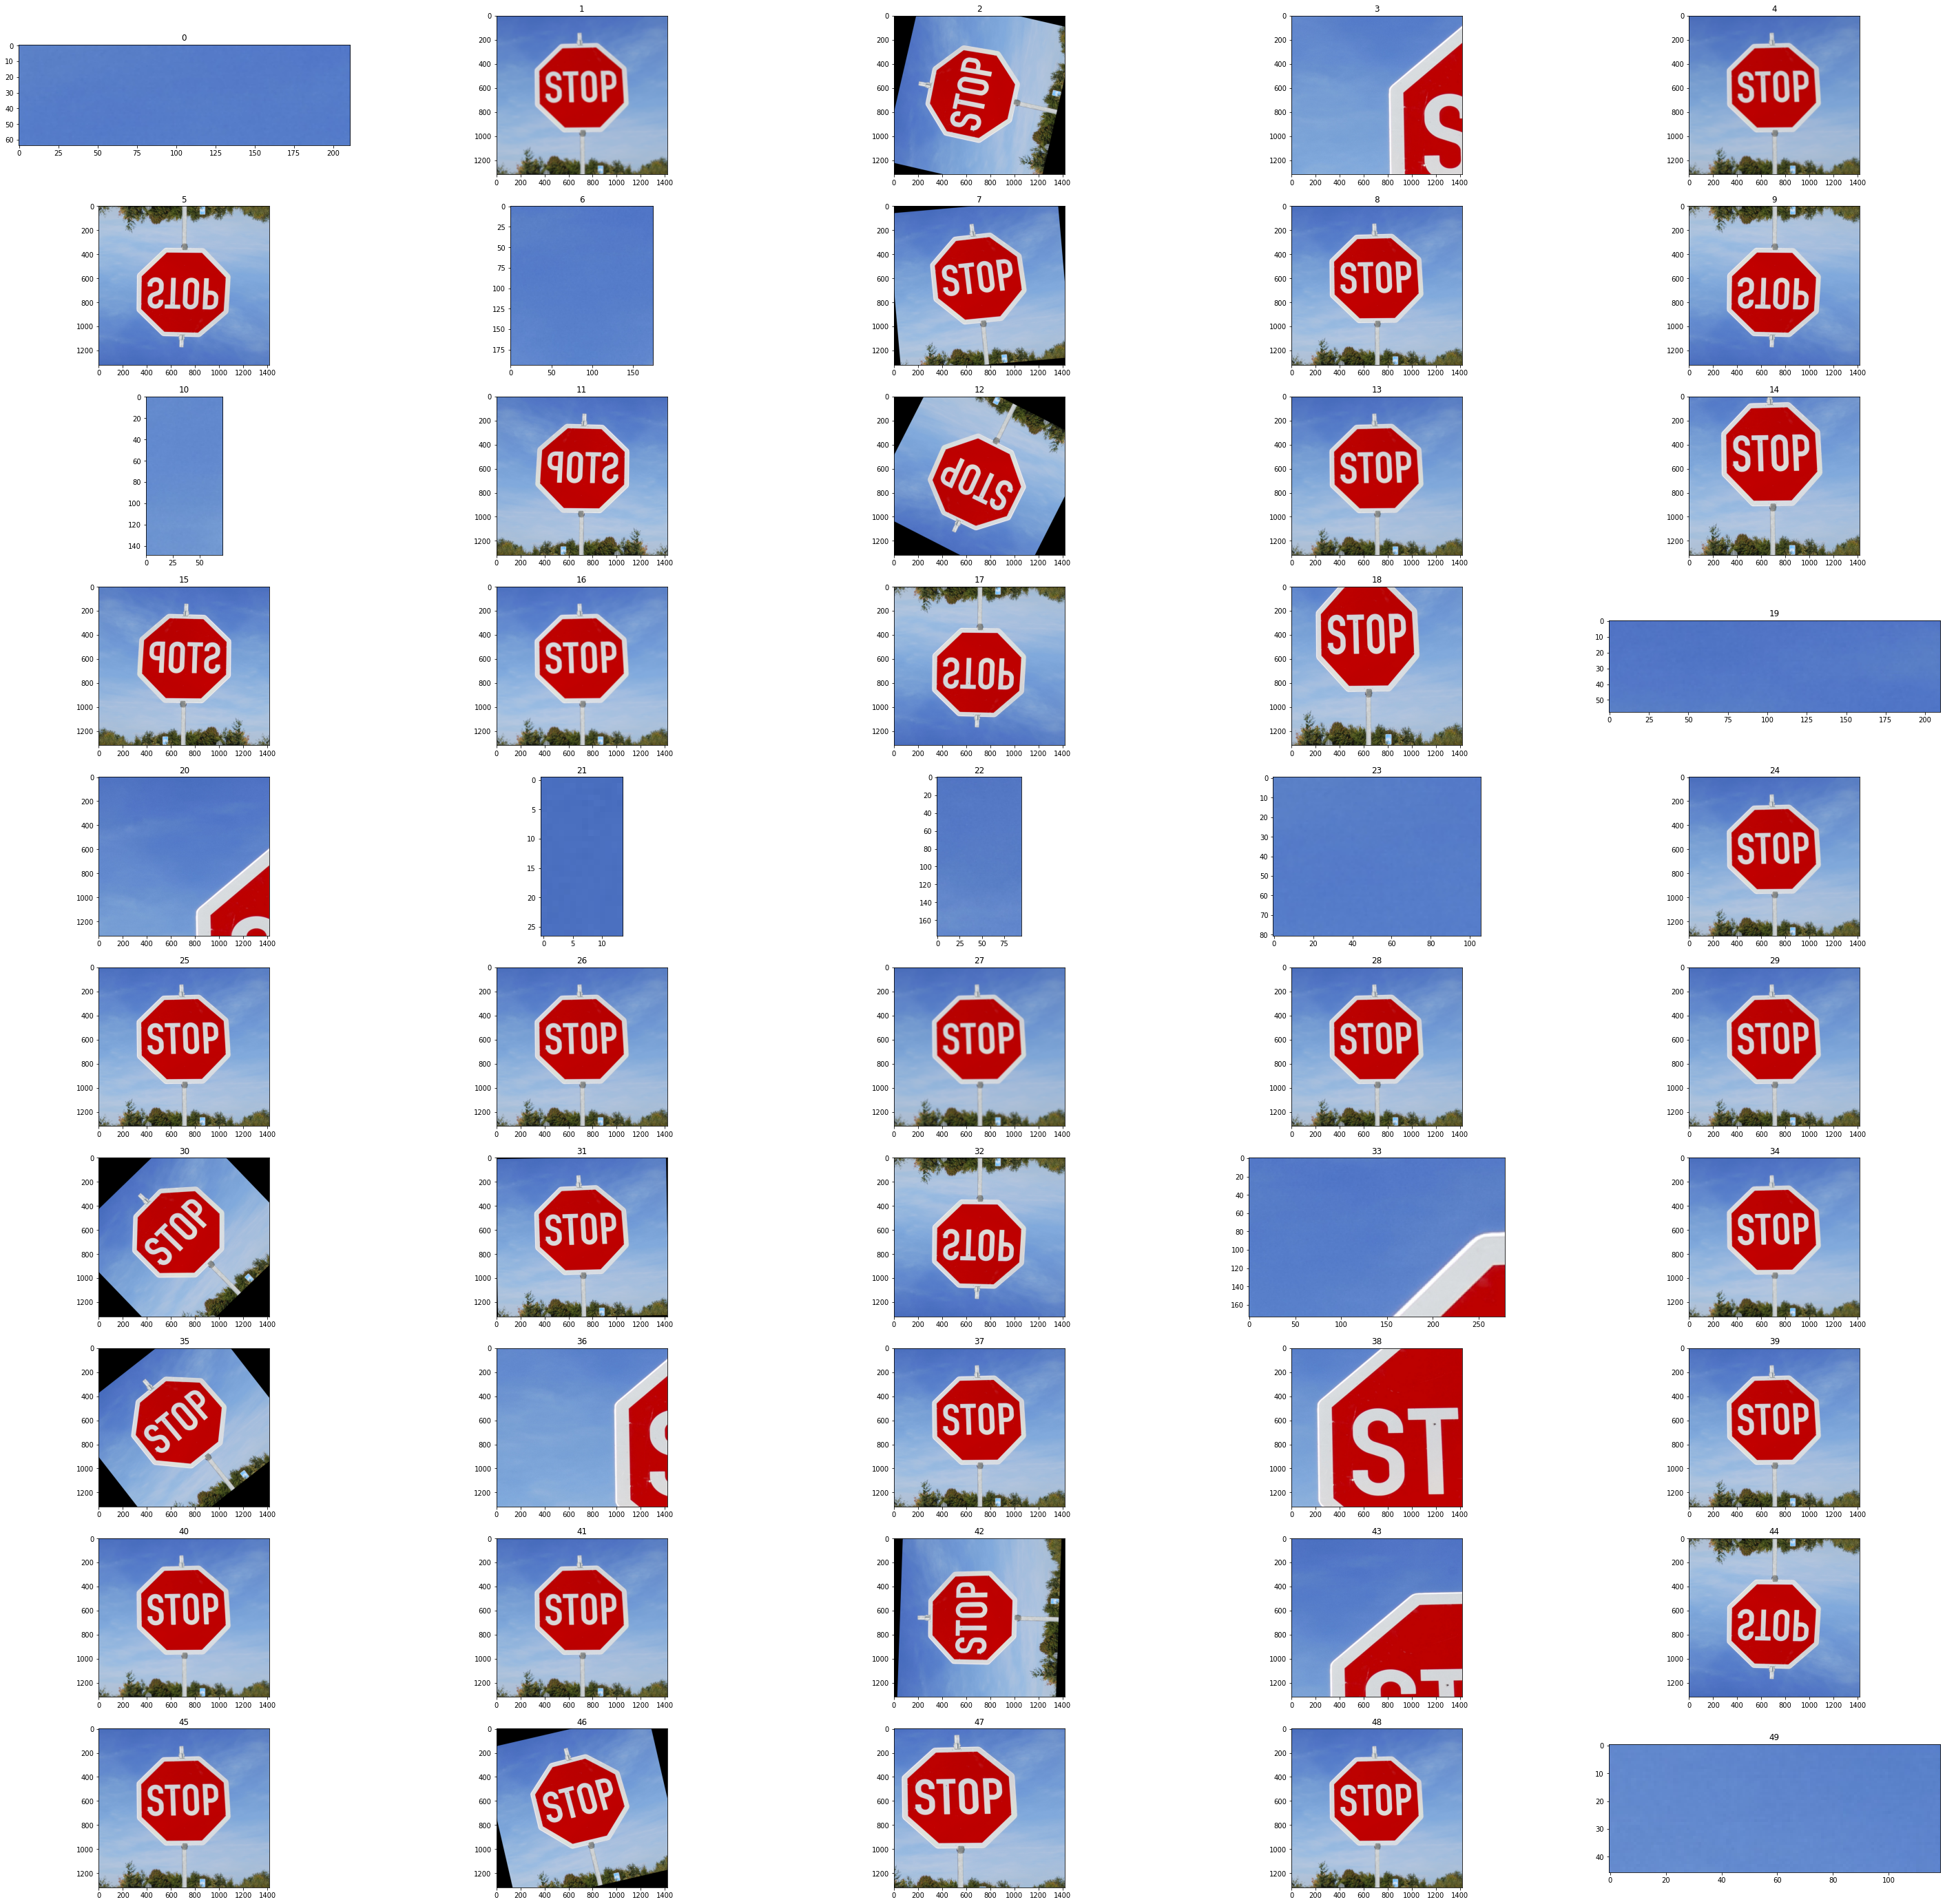

In [108]:
class Use_Augmentation (Augmentation):
  from enum import Enum
  class AugmentationEnum(Enum):
    FLIP = 1
    ROTATE = 2
    CROP = 3
    GAUSSIAN_BLUR = 4
    MEDIAN_BLUR = 5
    ZOOM = 6
  

  @staticmethod
  def random_augmentations(img, n, m=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]):
    # n = number of augmentations to commit
    # m = list of probabilities

    rand_size = np.random.choice([3, 5, 7, 9 ,11], 1, [1/5] * 5)
    aug_imges = list()
    current_img = np.zeros((img.shape))

    aug_types = np.random.choice([Use_Augmentation.AugmentationEnum.FLIP,
                                  Use_Augmentation.AugmentationEnum.ROTATE,
                                  Use_Augmentation.AugmentationEnum.CROP,
                                  Use_Augmentation.AugmentationEnum.GAUSSIAN_BLUR,
                                  Use_Augmentation.AugmentationEnum.MEDIAN_BLUR,
                                  Use_Augmentation.AugmentationEnum.ZOOM], n, m)

    for i in range(len(aug_types)):
      if aug_types[i] == Use_Augmentation.AugmentationEnum.FLIP:
        current_img = Augmentation.flip_img(img, np.random.randint(2))
      elif aug_types[i] == Use_Augmentation.AugmentationEnum.ROTATE:
        current_img = Augmentation.rotate_img(img, np.random.randint(180))
      elif aug_types[i] == Use_Augmentation.AugmentationEnum.CROP:
        current_img = Augmentation.crop_img(img, np.random.randint(300), np.random.randint(300), (np.random.randint(300), np.random.randint(300)))
      elif aug_types[i] == Use_Augmentation.AugmentationEnum.GAUSSIAN_BLUR:
        current_img = Augmentation.gaussian_blur(img, (rand_size, rand_size), np.random.randint(50))
        rand_size = np.random.choice([3, 5, 7, 9 ,11], 1, [1/5] * 5)
      elif aug_types[i] == Use_Augmentation.AugmentationEnum.MEDIAN_BLUR:
        current_img = Augmentation.median_blur(img, rand_size)
        rand_size = np.random.choice([3, 5, 7, 9 ,11], 1, [1/5] * 5)
      elif aug_types[i] == Use_Augmentation.AugmentationEnum.ZOOM:
        current_img = Augmentation.zoom_img(img, np.random.randint(1, 4), (np.random.randint(300), np.random.randint(300)))

      aug_imges.append(current_img)

    Image.show_all(aug_imges, [str(i) for i in range(n)])


stopsign = Image("./stopsign.jpg").read_image(True)
Use_Augmentation.random_augmentations(stopsign, 50)